<a href="https://colab.research.google.com/github/alanwuha/ce7455-nlp/blob/master/practice/Pytorch_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
import time

In [0]:
def load_data(seed=1984):
  np.random.seed(seed)
  N = 100
  DIM = 2
  CLS_NUM = 3

  x = np.zeros((N*CLS_NUM, DIM))
  t = np.zeros((N*CLS_NUM, CLS_NUM), dtype=np.int)

  for j in range(CLS_NUM):
    for i in range(N):  # N*j, N*(j+1)):
      rate = i / N
      radius = 1.0 * rate
      theta = j*4.0 + 4.0*rate + np.random.randn()*0.2

      ix = N*j + i
      x[ix] = np.array([radius*np.sin(theta),
                        radius*np.cos(theta)]).flatten()
      t[ix, j] = 1

  return x, t

In [0]:
class TwoLayersNN(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(TwoLayersNN, self).__init__()
    self.input_dim = input_dim
    self.hidden_dim = hidden_dim
    self.output_dim = output_dim

    # Default PyTorch layer is initialized with a normal distribution
    self.hidden_layer = nn.Linear(input_dim, hidden_dim)
    nn.init.xavier_normal_(self.hidden_layer.weight)  # Xavier Initialization
    # nn.init.kaiming_normal_(self.hidden_layer.weight) # He Initialization
    self.output_layer = nn.Linear(hidden_dim, output_dim)
    self.sigmoid = nn.Sigmoid()
    self.dropout = nn.Dropout(p=0.2)
    self.batchnorm = nn.BatchNorm1d(num_features=10)

  def forward(self, inputs):
    out = self.hidden_layer(inputs)
    out = self.batchnorm(out)
    out = self.sigmoid(out)
    out = self.dropout(out)

    out = self.output_layer(out)

    return out

In [0]:
hidden_dim = 10
output_dim = 3
input_dim = 2

lr = 1

criterion = nn.CrossEntropyLoss()
model = TwoLayersNN(input_dim, hidden_dim, output_dim)
optimizer = optim.SGD(model.parameters(), lr)

x: (300, 2)
t: (300, 3)


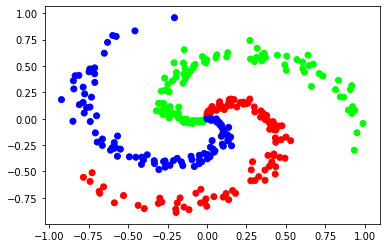

In [5]:
x, t = load_data()
print(f'x: {x.shape}')
print(f't: {t.shape}')

plt.scatter(x[:,0], x[:,1], color=t)
plt.show()

In [26]:
epoch = 200
batch_size = 30
data_size = len(x)
max_iters = data_size // batch_size

total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(epoch):

  # Shuffle data
  idx = np.random.permutation(data_size)
  x = x[idx]
  t = t[idx]

  for iters in range(max_iters):
    optimizer.zero_grad()
    start_t = time.perf_counter()
    batch_x = x[iters*batch_size : (iters+1)*batch_size]
    batch_t = t[iters*batch_size : (iters+1)*batch_size]

    # Numpy to Tensor
    batch_x = torch.Tensor(batch_x)
    batch_t = torch.Tensor(batch_t.argmax(axis=1)).type(torch.LongTensor)

    output = model(batch_x)
    loss = criterion(output, batch_t)
    loss.backward()
    # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5) # Gradient clipping
    optimizer.step()

    # # Weight clipping
    # for p in model.parameters():
    #   p.data.clamp_(-0.01, 0.01)

    total_loss += loss
    loss_count += 1

    ent_t = time.perf_counter()
    iter_time = ent_t - start_t

    if (iters+1) % 10 == 0:
      avg_loss = total_loss / loss_count
      output = output.data.numpy()
      pred = np.argmax(output, axis=1)
      acc = np.sum(pred == batch_t.data.numpy()) / batch_size

      print(f'Epoch: {epoch} || Iter: {iters}/{max_iters} || Accuracy: {acc:.2f} || AverageLoss: {avg_loss:.4f} || Elapsed: {iter_time:.6f}')
      loss_list.append(avg_loss)
      total_loss, loss_count = 0, 0

Epoch: 0 || Iter: 9/10 || Accuracy: 0.63 || AverageLoss: 1.0326 || Elapsed: 0.000849
Epoch: 1 || Iter: 9/10 || Accuracy: 0.73 || AverageLoss: 0.9264 || Elapsed: 0.000569
Epoch: 2 || Iter: 9/10 || Accuracy: 0.63 || AverageLoss: 0.8746 || Elapsed: 0.000615
Epoch: 3 || Iter: 9/10 || Accuracy: 0.53 || AverageLoss: 0.8863 || Elapsed: 0.000671
Epoch: 4 || Iter: 9/10 || Accuracy: 0.43 || AverageLoss: 0.8637 || Elapsed: 0.000732
Epoch: 5 || Iter: 9/10 || Accuracy: 0.50 || AverageLoss: 0.8879 || Elapsed: 0.000740
Epoch: 6 || Iter: 9/10 || Accuracy: 0.57 || AverageLoss: 0.8968 || Elapsed: 0.000681
Epoch: 7 || Iter: 9/10 || Accuracy: 0.57 || AverageLoss: 0.8063 || Elapsed: 0.000675
Epoch: 8 || Iter: 9/10 || Accuracy: 0.53 || AverageLoss: 0.8533 || Elapsed: 0.000640
Epoch: 9 || Iter: 9/10 || Accuracy: 0.67 || AverageLoss: 0.8681 || Elapsed: 0.000772
Epoch: 10 || Iter: 9/10 || Accuracy: 0.60 || AverageLoss: 0.8373 || Elapsed: 0.000730
Epoch: 11 || Iter: 9/10 || Accuracy: 0.73 || AverageLoss: 0.8136

In [23]:
t.argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

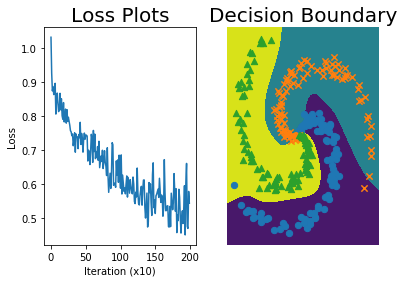

In [29]:
# Plot Loss ----------------------------
fig, axes = plt.subplots(1,2)
axes[0].plot(np.arange(len(loss_list)), loss_list, label='train')
axes[0].set_title('Loss Plots', fontsize=20)
axes[0].set_xlabel('Iteration (x10)')
axes[0].set_ylabel('Loss')

# Decision Boundary 
x, t = load_data(0) # Test dataset

h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
X = torch.Tensor(X)

with torch.no_grad():
  model.eval() # turn off dropout and batch_norm
  score = model.forward(X)
predict_cls = np.argmax(score.data.numpy(), axis=1)
Z = predict_cls.reshape(xx.shape)
axes[1].set_title('Decision Boundary', fontsize=20)
axes[1].contourf(xx, yy, Z)
axes[1].axis('off')

# Plot Data 
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    axes[1].scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()